In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [3]:
master_train = pd.read_csv('data/train.csv')
master_test = pd.read_csv('data/test.csv')

In [4]:
train = pd.DataFrame.copy(master_train)
test  = pd.DataFrame.copy(master_test)

In [47]:
print("Train Rows:    ", train.shape[0])
print("Train Columns: ", train.shape[1])
print("Test Rows:     ", test.shape[0])
print("Test Columns:  ", test.shape[1])

Train Rows:     188318
Train Columns:  132
Test Rows:      125546
Test Columns:   131


In [ ]:
train.head()

In [ ]:
train.describe()

In [12]:
## Looking at the unique values for each column
unique_vals = []
counter = 0
for column in train.columns:
    if len(unique_vals) != len(np.unique(train[column])):
        print(counter, ': ', np.unique(train[column]))
    unique_vals = np.unique(train[column])
    counter += 1

0 :  [     1      2      5 ..., 587630 587632 587633]
1 :  ['A' 'B']
73 :  ['A' 'B' 'C']
77 :  ['A' 'B' 'C' 'D']
89 :  ['A' 'B' 'C' 'D' 'E' 'G' 'H' 'I']
90 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G']
91 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H']
92 :  ['A' 'B' 'C' 'D' 'F' 'H' 'I']
93 :  ['A' 'B' 'C' 'D' 'E']
94 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G']
95 :  ['A' 'B' 'C' 'D' 'E']
96 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'I']
97 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G']
98 :  ['A' 'B' 'C' 'D' 'E']
99 :  ['C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'M' 'N' 'O' 'P' 'R' 'S' 'T']
100 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
101 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'Q' 'R' 'S'
 'U']
102 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'J']
103 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'N']
104 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q']
105 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T']
106 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'

### Charting with a 10,000 row sample

In [25]:
# creating a sample
train_s = train.sample(n=10000)

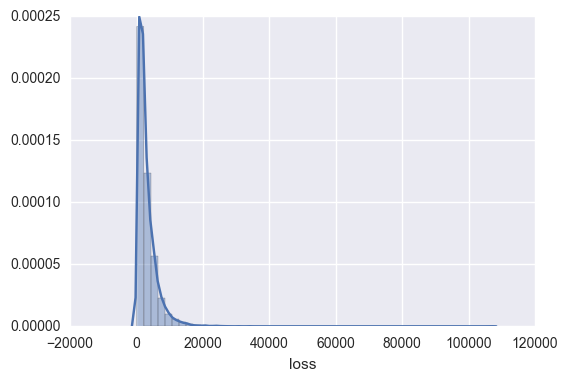

In [26]:
sns.distplot(train_s['loss'])

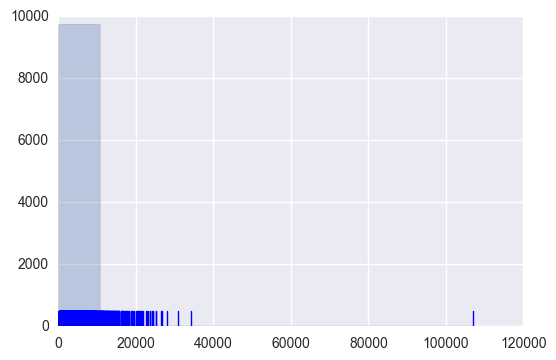

In [27]:
plt.hist(train_s['loss'], alpha=.3)
sns.rugplot(train_s['loss']);

In [28]:
cols = train_s.columns
num_cols = train_s._get_numeric_data().columns
num_cols

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'loss'],
      dtype='object')

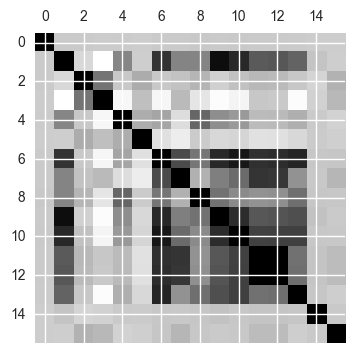

In [29]:
plt.matshow(train_s.corr())

### Feature Engineering
Creating a wide data frame using one-hot encoding on all categorical variables

In [48]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# def master_encoder(dataframe, column):
#     newcol = 't' + column
#     dataframe[newcol] = encoder.fit_transform(dataframe[column])

def onehot_encoder(dataframe, column):
    new_frame = pd.get_dummies(dataframe[column]).rename(columns=lambda x: column + '_' + str(x))
    return pd.concat([dataframe, new_frame], axis=1)

for column in train.columns:
    if 'cat' in column:
        train = onehot_encoder(train, column)

### Building a train and validation dataset out of train

In [92]:
indexes = np.random.rand(len(train)) < 0.8
idx_model_train = train[indexes]
idx_model_valid = train[~indexes]

print('Rows in training data:   ', len(idx_model_train))
print('Columns in training data:   ', len(idx_model_train.columns))
print('Rows in validation data: ', len(idx_model_valid))
print('Columns in validation data: ', len(idx_model_valid.columns))
print('Total Rows: ', len(train))

Rows in training data:    150428
Columns in training data:    1271
Rows in validation data:  37890
Columns in validation data:  1271
Total Rows:  188318


### Selecting the columns to run regression

In [94]:
def column_selector(dataframe):
    total_rows = len(dataframe.columns.format())
    starting_spot = np.where(dataframe.columns=='cont1')[0][0]
    output = dataframe.ix[:,starting_spot:total_rows]
    return(output)

model_train = column_selector(idx_model_train)
model_valid = column_selector(idx_model_valid)

print('Rows in training data:   ', len(model_train))
print('Columns in training data:   ', len(model_train.columns))
print('Rows in validation data: ', len(model_valid))
print('Columns in validation data: ', len(model_valid.columns))
print('Total Rows: ', len(train))

Rows in training data:    150428
Columns in training data:    1154
Rows in validation data:  37890
Columns in validation data:  1154
Total Rows:  188318


In [95]:
from sklearn import linear_model

# Split the data into training/testing sets
x_train = model_train.drop('loss', axis=1)
x_valid = model_valid.drop('loss', axis=1)

# Split the targets into training/testing sets
y_train = model_train['loss']
y_valid = model_valid['loss']


print('Rows in training data:   ', len(x_train))
print('Columns in training data:   ', len(x_train.columns))
print('Rows in validation data: ', len(x_valid))
print('Columns in validation data: ', len(x_valid.columns))
print('Total Rows: ', len(train))

Rows in training data:    150428
Columns in training data:    1153
Rows in validation data:  37890
Columns in validation data:  1153
Total Rows:  188318


In [96]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
output_train = pd.DataFrame.copy(idx_model_train)
output_valid = pd.DataFrame.copy(idx_model_valid)

In [101]:
output_train['predicted_loss'] = regr.predict(x_train)
output_valid['predicted_loss'] = regr.predict(x_valid)

In [105]:
output_train['error'] = output_train['predicted_loss'] - output_train['loss']
output_valid['error'] = output_valid['predicted_loss'] - output_valid['loss']

In [108]:
output_train[['predicted_loss', 'loss', 'error']]
np.mean(abs(output_train['error']))

1288.3796890871376

In [109]:
np.mean(abs(output_valid['error']))

62423520619.784241

In [110]:
output_valid[['predicted_loss', 'loss', 'error']]

,predicted_loss,loss,error
4,5393.5,2763.85,2629.65
14,1152.0,585.18,566.82
15,1631.5,1395.45,236.05
25,1964.0,1528.73,435.27
26,3431.5,4787.07,-1355.57
32,4960.5,5370.72,-410.22
37,10449.5,11248.08,-798.58
38,1470.5,876.78,593.72
43,2299.0,3110.41,-811.41
50,2477.5,3976.75,-1499.25


In [134]:
coefficients = pd.DataFrame(list(zip(x_train.columns, regr.coef_)), columns = ['features', 'coefficients'])
coefficients.sort('coefficients', ascending = 0)

/Users/matthew.negrin/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,features,coefficients
316,cat101_A,3.294338e+15
62,cat25_A,3.169029e+15
63,cat25_B,3.132299e+15
344,cat103_A,2.938816e+15
20,cat4_A,2.722876e+15
23,cat5_B,2.634887e+15
21,cat4_B,1.595724e+15
24,cat6_A,1.287577e+15
25,cat6_B,9.995293e+14
186,cat81_A,9.445573e+14


In [156]:
my_series = pd.Series(train['cat101'])
counts = my_series.value_counts()
counts

A    106721
D     17171
C     16971
G     10944
F     10139
J      7259
I      6690
M      3669
L      3173
Q      2762
O      2493
S       173
R       138
E         7
B         3
K         2
U         1
H         1
N         1
Name: cat101, dtype: int64